**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import os
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
# useful directories
base_dir = 'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Experimental Physics 1\\Fall 2021\\Experiment Sequences\\Relativistic Dynamics'
dir_data = base_dir + '\\Data'
dir_plot = base_dir + '\\Paper and Oral'

In [3]:
os.getcwd()

'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Experimental Physics 1\\Fall 2021\\Experiment Sequences\\Relativistic Dynamics'

**Show Sample Theoretical Plots of the Energy vs Speed Plots**

Non-Relativistic Model: $K = \frac{1}{2}mv^{2}$

In [4]:
def nrke(v):
    # get electron mass (in kg)
    me = 9.10938*10**-31
    
    return 0.5*me*v**2

Relativistic Model: $K=(\gamma-1)mc^{2}$

In [5]:
def rke(v):
    # get speed of light (in m/s)
    c = 299792458
    
    # get electron mass (in kg)
    me = 9.10938*10**-31
    
    # get gamma factor
    gamma = (1-v**2/c**2)**-0.5
    
    return (gamma-1)*me*c**2

**Plot the Theoretical Functions of $K(v)$**

In [6]:
# plotting parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

In [7]:
# speed of light
c = 299792458

# values to plot
vs = np.linspace(0,2,1000)

vals = c*vs

C:\Users\vega0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


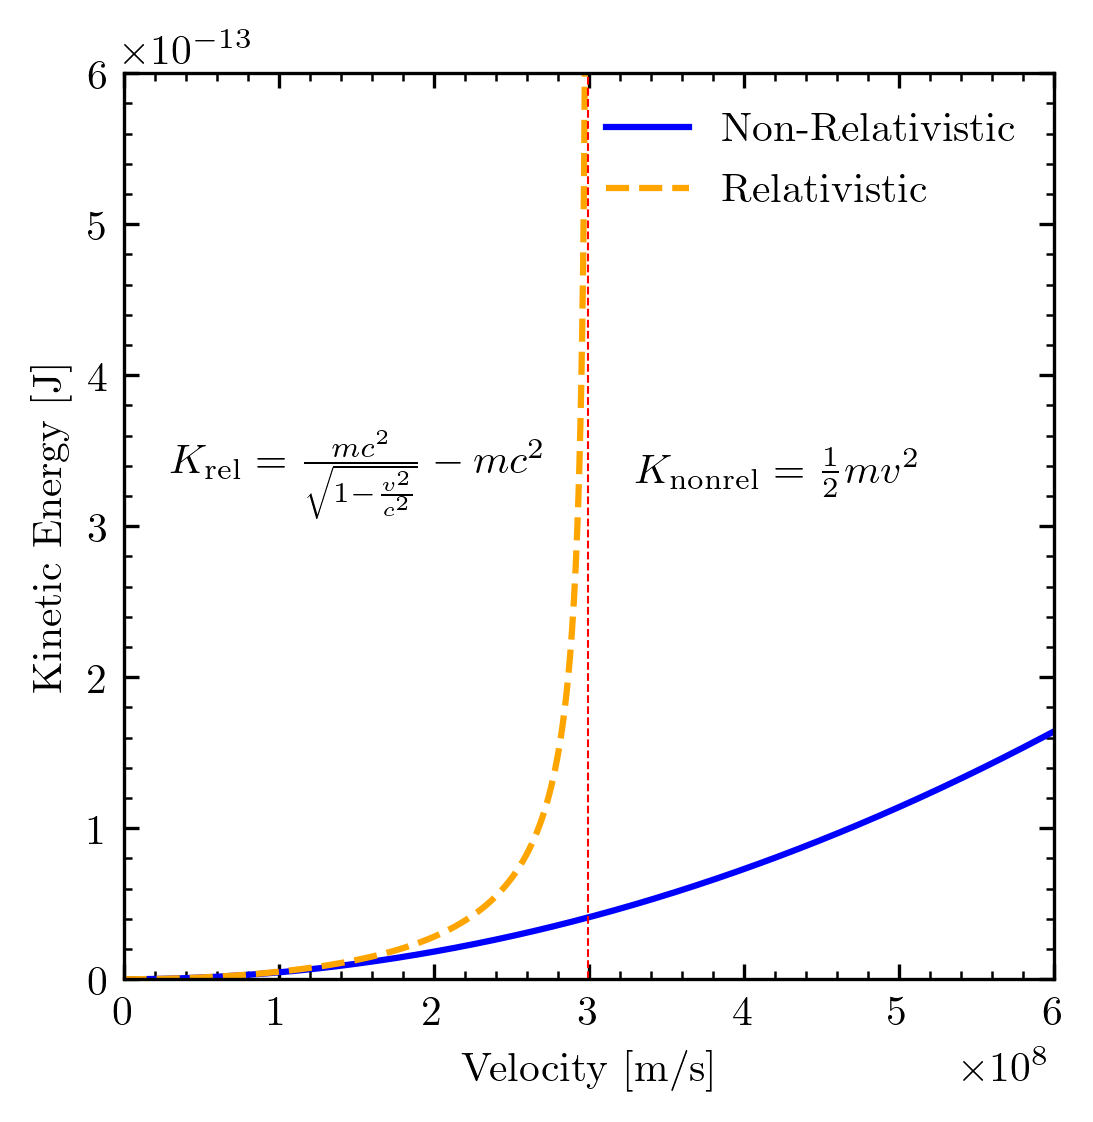

In [8]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,6*10**8), ylim=(0,6*10**-13), 
                         xlabel='Velocity [m/s]', ylabel='Kinetic Energy [J]')
# non-relativistic
ax.plot(vals, nrke(vals), label='Non-Relativistic', color='blue', ls='-')

# relativistic
ax.plot(vals, rke(vals), label='Relativistic', color='orange', ls='--')
# vertical line cutoff
ax.axvline(c, ymin=0, ymax=1, color='red', lw=0.5, ls='--')

modplot.stamp(0.05,0.55, ax=ax, delta_y=0.055,textops_update = {'fontsize':10},
              line_0=r'$K_{\mathrm{rel}}=\frac{mc^{2}}{\sqrt{1-\frac{v^{2}}{c^{2}}}}-mc^{2}$')
modplot.stamp(0.55,0.55, ax=ax, delta_y=0.055,textops_update = {'fontsize':10},
              line_0=r'$K_{\mathrm{nonrel}}=\frac{1}{2}mv^{2}$')

ax.legend(frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\theoretical_ke_models.png')

**Determine Velocities**

In [9]:
os.chdir(dir_data)

In [10]:
os.listdir()

['Barium 133 Calibrations',
 'beta_vs_B.xlsx',
 'count_rate_maximizing_voltages.xlsx',
 'Day 10',
 'Day 11',
 'Day 8',
 'Day 9',
 'ke_vs_v.xlsx']

In [11]:
df = pd.read_excel('beta_vs_B.xlsx')

In [12]:
bfield = np.array(df['B (Gauss)'])
buncert = np.array(df['B Uncertainty'])
volts = np.array(df['Voltage (kV)'])

In [13]:
# calculate the electric field
x = 0.0018
efield = volts/x

In [14]:
# get the velocities in correct units
v = efield*1000/(bfield*10**-4)

In [15]:
vuncert = buncert/bfield*v

In [16]:
v

array([1.90476190e+08, 2.01388889e+08, 2.09876543e+08, 2.22000222e+08,
       2.27479527e+08, 2.33230712e+08])

 **Plot the Kinetic Energy vs Velocity Data**

In [17]:
# ke data
k = np.array([146.52, 185.63, 224.71, 263.55, 310.36, 350.88])/(6.242*10**15)
kuncert = np.array([0.2, 0.13, 0.11, 0.11, 0.11, 0.13])/(6.242*10**15)

In [18]:
k

array([2.34732458e-14, 2.97388657e-14, 3.59996796e-14, 4.22220442e-14,
       4.97212432e-14, 5.62127523e-14])

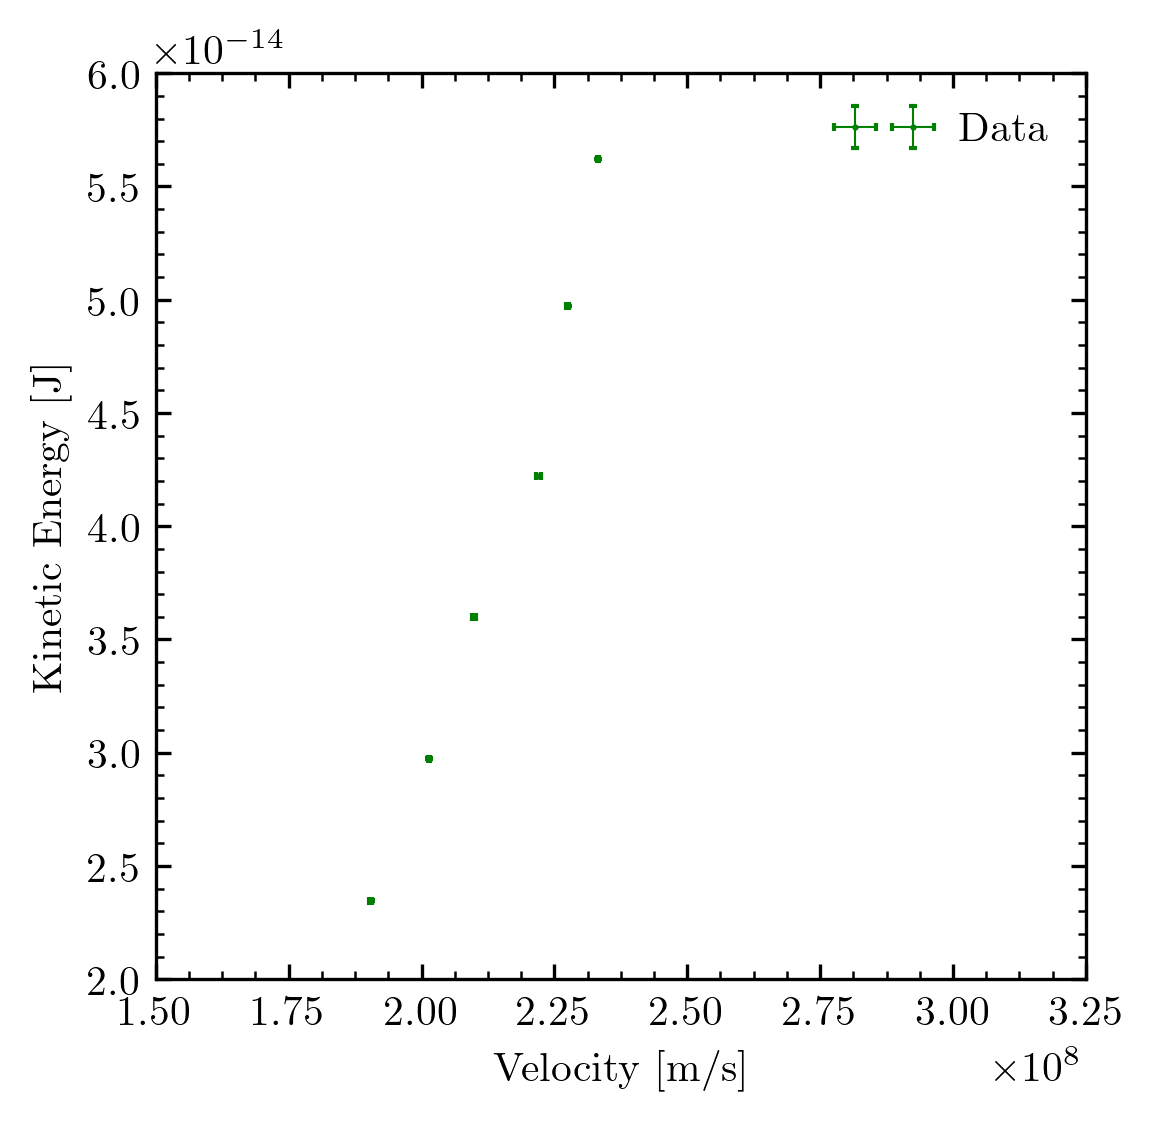

In [19]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(1.5*10**8,3.25*10**8), 
                         ylim=(2*10**-14,6*10**-14), xlabel='Velocity [m/s]', 
                         ylabel='Kinetic Energy [J]')
ax.errorbar(v, k, xerr=vuncert, yerr=kuncert, color='green', label='Data', marker='.', ms=1,
            ls='none', elinewidth=0.5, capsize=1, capthick=1, lw=0.5)

ax.legend(frameon=False, numpoints=2, loc='upper right')

Perform Fits to the Data in 2 Models to See which is better

In [20]:
# nonrelativistic model
def nonrel_func(v, m):
    return 0.5*m*v**2

# relativistic model
def rel_func(v, m):
    # take speed of light as given
    c = 299792458
    return m*c**2*((1-v**2/c**2)**-0.5-1)

Do the fits

In [21]:
# nonrel
popt_nr, pcov_nr = curve_fit(nonrel_func, v, k, p0 = [9.11*10**-31])

In [22]:
popt_nr

array([1.7513621e-30])

In [23]:
uncert_nr = np.sqrt(np.diag(pcov_nr)) # Extract uncertainty from fit

In [24]:
# relativistic
popt_rel, pcov_rel = curve_fit(rel_func, v, k, p0 = [9.11*10**-31])

In [25]:
popt_rel

array([1.00332278e-30])

In [26]:
kerrs = np.array([3.04, 2.58, 3.18, 3.24, 3.50, 3.81])/(6.242*10**15)

In [27]:
def chisq(func,popt,x,y,sig):
    expected_vals = func(x, *popt) # Again, better off using *popt
    return np.sum((y-expected_vals)**2/sig**2)

chi_nr = chisq(nonrel_func, popt_nr, v, k, sig=kerrs)
chi_rel = chisq(rel_func, popt_rel, v, k, sig=kerrs)

In [28]:
rel_func(v,popt_rel)-k

array([ 3.12583776e-15,  1.81762008e-15,  1.07856598e-16,  1.78314478e-15,
       -1.45034218e-15, -2.86526831e-15])

In [29]:
chi_nr

773.6459626570634

In [30]:
chi_rel

101.10437079254287

In [31]:
# get the corresponding p values
prob_nr = 1 - stats.chi2.cdf(chi_nr,5)
prob_rel = 1 - stats.chi2.cdf(chi_rel,5)

In [32]:
prob_rel

0.0

In [33]:
prob_nr

0.0

**Plot the Results Altogether**

C:\Users\vega0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


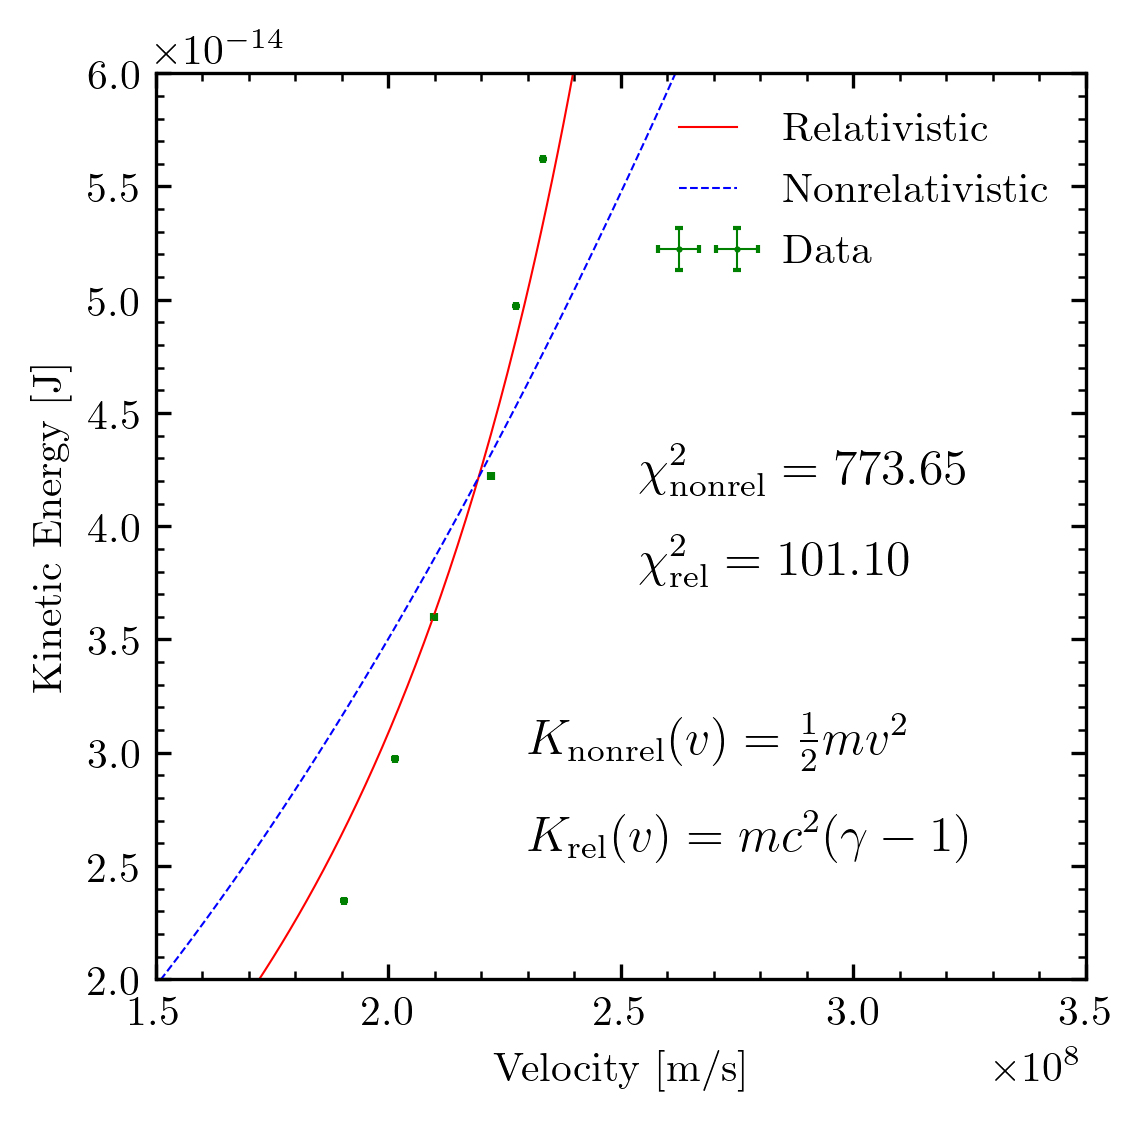

In [34]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(1.5*10**8,3.5*10**8), 
                         ylim=(2*10**-14,6*10**-14), xlabel='Velocity [m/s]', 
                         ylabel='Kinetic Energy [J]')
# data
ax.errorbar(v, k, xerr=vuncert, yerr=kuncert, color='green', label='Data', marker='.', ms=1,
            ls='none', elinewidth=0.5, capsize=1, capthick=1, lw=0.5)

# relativistic fit
ax.plot(vals, rel_func(vals, popt_rel), color='red', label='Relativistic', lw=0.5)

# nonrelativistic fit
ax.plot(vals, nonrel_func(vals, popt_nr), color='blue', label='Nonrelativistic', lw=0.5, ls='--')

# chi squared values
modplot.stamp(0.52, 0.55, ax=ax, delta_y=0.1,textops_update = {'fontsize':12},
              line_0='$\chi^{2}_{\mathrm{nonrel}}=773.65$',
              line_1='$\chi^{2}_{\mathrm{rel}}=101.10$')

# functional forms
modplot.stamp(0.40, 0.25, ax=ax, delta_y=0.1,textops_update = {'fontsize':12},
              line_0=r'$K_{\mathrm{nonrel}}(v)=\frac{1}{2}mv^{2}$',
              line_1=r'$K_{\mathrm{rel}}(v)=mc^{2}(\gamma-1)$')

ax.legend(frameon=False, numpoints=2, loc='upper right')

save = True
if save:
    plt.savefig(dir_plot + '\\model_data_comparison.png')

In [35]:
rel_func(v, popt_rel)

array([2.65990835e-14, 3.15564858e-14, 3.61075362e-14, 4.40051890e-14,
       4.82709010e-14, 5.33474840e-14])

**Make a Plot of K versus $\gamma -1$**

In [36]:
def gamma_func(v):
    # get speed of light
    c = 299792458
    
    return (1-v**2/c**2)**-0.5

In [37]:
v

array([1.90476190e+08, 2.01388889e+08, 2.09876543e+08, 2.22000222e+08,
       2.27479527e+08, 2.33230712e+08])

In [38]:
gamma_func(v)-1

array([0.29497458, 0.34995045, 0.40042002, 0.48800224, 0.5353075 ,
       0.59160504])

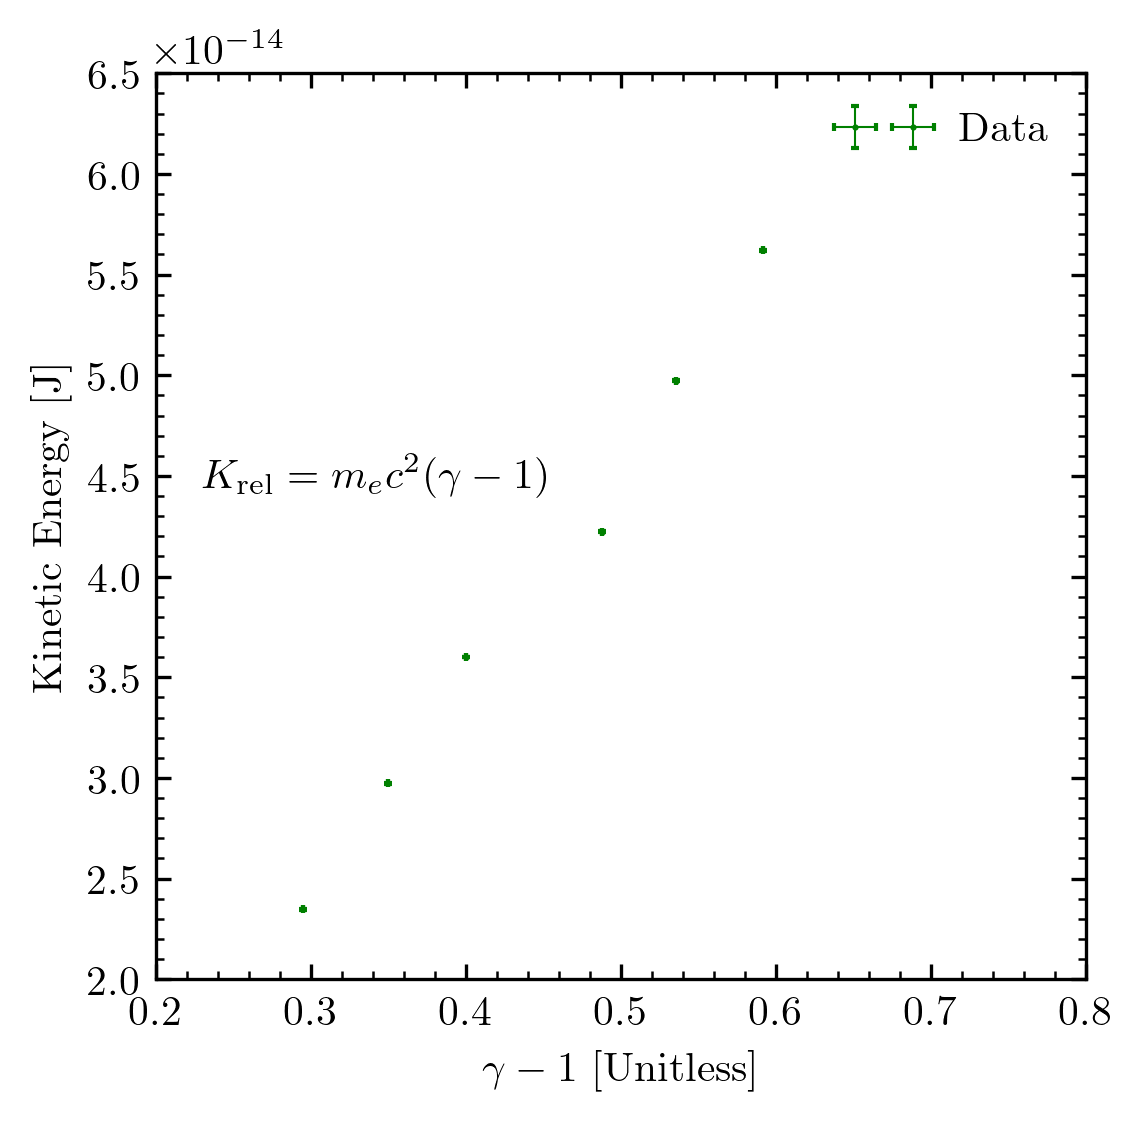

In [42]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0.2,0.8), 
                         ylim=(2*10**-14,6.5*10**-14), xlabel='$\gamma -1$ [Unitless]', 
                         ylabel='Kinetic Energy [J]')
# data
ax.errorbar(gamma_func(v)-1, k, xerr=0, yerr=kuncert, color='green', label='Data', marker='.', ms=1,
            ls='none', elinewidth=0.5, capsize=1, capthick=1, lw=0.5)


# functional form
modplot.stamp(0.05, 0.55, ax=ax, delta_y=0.1,textops_update = {'fontsize':10},
              line_0=r'$K_{\mathrm{rel}}=m_{e}c^{2}(\gamma-1)$')

ax.legend(frameon=False, numpoints=2, loc='upper right')

save = False
if save:
    plt.savefig(dir_plot + '\\k_vs_gamma.png')

In [76]:
# get a linear functional
def linear_func(x, a):
    return a*x

In [77]:
xvals = gamma_func(v) - 1

In [78]:
popt_lin, pcov_lin = curve_fit(linear_func, xvals, k, p0 = [299792458**2*9.11*10**-31])

In [79]:
popt_lin

array([9.0174154e-14])

In [80]:
np.sqrt(np.diag(pcov_lin))

array([2.06674173e-15])

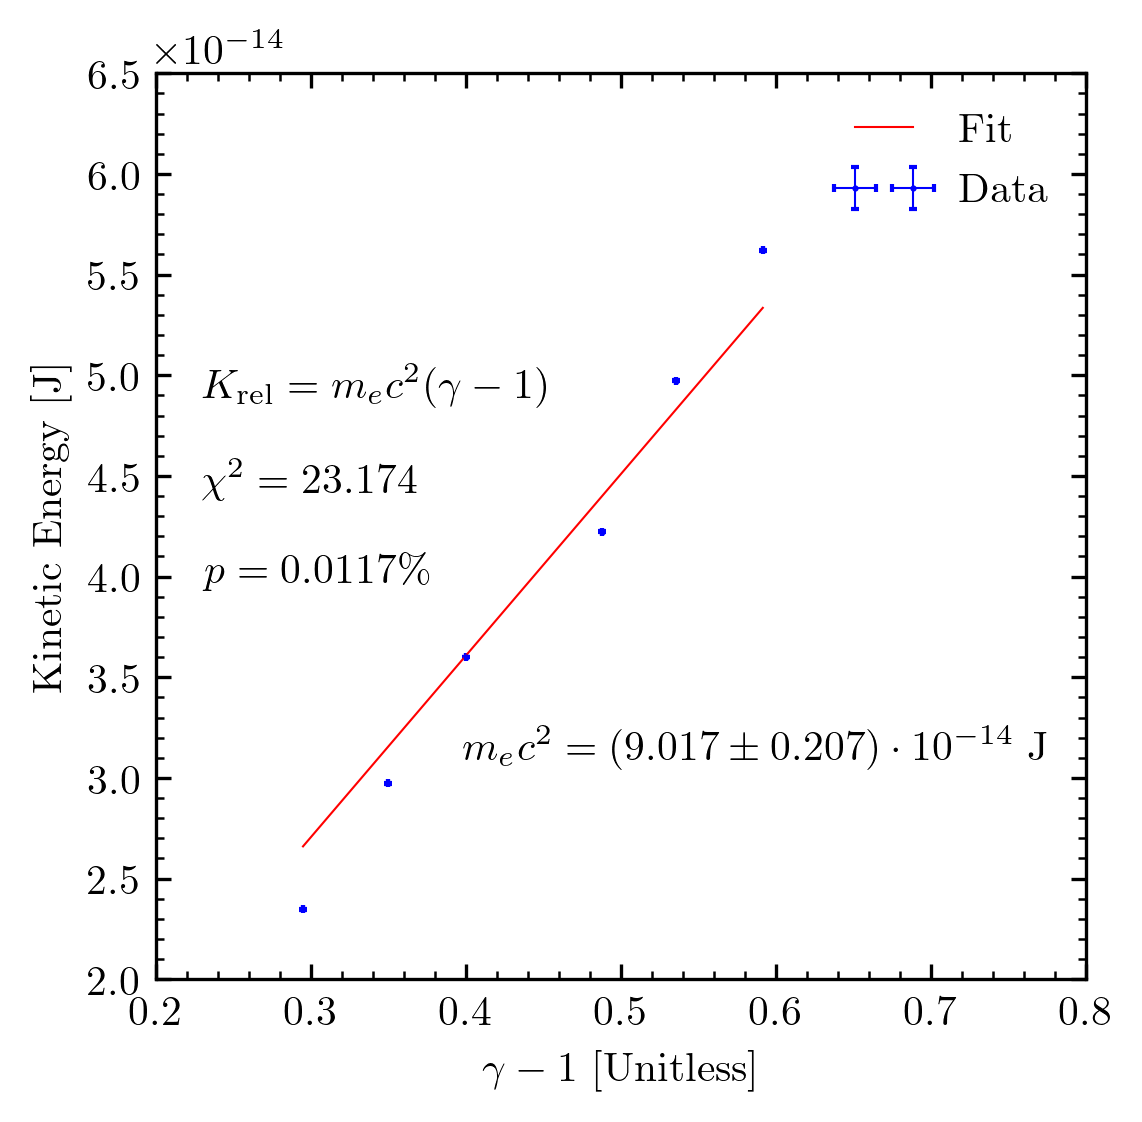

In [84]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0.2,0.8), 
                         ylim=(2*10**-14,6.5*10**-14), xlabel='$\gamma -1$ [Unitless]', 
                         ylabel='Kinetic Energy [J]')
# data
ax.errorbar(gamma_func(v)-1, k, xerr=0, yerr=kuncert, color='blue', label='Data', marker='.', ms=1,
            ls='none', elinewidth=0.5, capsize=1, capthick=1, lw=0.5)
# linear fit
ax.plot(xvals, linear_func(xvals, *popt_lin), color='red', label='Fit', lw=0.5)

# functional form
modplot.stamp(0.05, 0.65, ax=ax, delta_y=0.1,textops_update = {'fontsize':10},
              line_0=r'$K_{\mathrm{rel}}=m_{e}c^{2}(\gamma-1)$',
              line_1='$\chi^{2}=23.174$', 
              line_2='$p=0.0117\%$')

modplot.stamp(0.33, 0.25, ax=ax, delta_y=0.1,textops_update = {'fontsize':10},
              line_0='$m_{e}c^{2}=(9.017 \pm 0.207)\cdot 10^{-14}$ J')

ax.legend(frameon=False, numpoints=2, loc='upper right')

save = True
if save:
    plt.savefig(dir_plot + '\\k_vs_gamma.png')

In [63]:
chi_lin = chisq(linear_func, popt_lin, xvals, k, sig=kerrs)

In [64]:
chi_lin

23.173539536424236

In [67]:
prob_lin = 1 - stats.chi2.cdf(chi_lin,4)

In [68]:
prob_lin

0.00011690796878116583